# Overview

Classify whether bank client will subscribe to a marketing campaign based on other factors

In [382]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [383]:
data_df = pd.read_csv(r'..\datasets\bank-data.csv', index_col=0)
data_df.head()

,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
1,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [384]:
data_df.describe()

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted
count,11162.000000,9475.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1824.106385,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3414.744888,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,10.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,282.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,771.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,2071.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [385]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11162 entries, 1 to 11162
Data columns (total 17 columns):
age                               11162 non-null int64
job                               11162 non-null object
maritalStatus                     11162 non-null object
education                         11162 non-null object
defaultedCredit                   11162 non-null object
balance                           9475 non-null float64
housingLoan                       11162 non-null object
personalLoan                      11162 non-null object
contactType                       11162 non-null object
day_of_month                      11162 non-null int64
month                             11162 non-null object
callDuration                      11162 non-null int64
numberTimesContactedInCampaign    11162 non-null int64
daysSinceLastContact              11162 non-null int64
totalTimesContacted               11162 non-null int64
outcomeLastCampaign               11162 non-null object
s

In [386]:
data_df.nunique()

age                                 76
job                                 12
maritalStatus                        3
education                            4
defaultedCredit                      2
balance                           3371
housingLoan                          2
personalLoan                         2
contactType                          3
day_of_month                        31
month                               12
callDuration                      1428
numberTimesContactedInCampaign      36
daysSinceLastContact               472
totalTimesContacted                 34
outcomeLastCampaign                  4
subscribed                           2
dtype: int64

In [387]:
from sklearn.preprocessing import LabelEncoder
object_df = data_df.select_dtypes(include=['object'])
exclude_col = ['month', 'day_of_month']
outcome_df = None
le_map = {}
for col in object_df.columns:
    if col in exclude_col:
        continue
    if len(object_df[col].value_counts()) <= 2:
        le_map[col] = LabelEncoder()
        feature_df = pd.DataFrame(le_map[col].fit_transform(object_df[col]), columns=[col], index=object_df.index)
    else:
        feature_df = pd.get_dummies(object_df[col], prefix=col)
    outcome_df = pd.concat([outcome_df, feature_df], axis=1)
outcome_df.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'maritalStatus_divorced', 'maritalStatus_married',
       'maritalStatus_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'defaultedCredit',
       'housingLoan', 'personalLoan', 'contactType_cellular',
       'contactType_telephone', 'contactType_unknown',
       'outcomeLastCampaign_failure', 'outcomeLastCampaign_other',
       'outcomeLastCampaign_success', 'outcomeLastCampaign_unknown',
       'subscribed'],
      dtype='object')

In [388]:
print(outcome_df.shape)
outcome_df.head()

(11162, 30)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housingLoan,personalLoan,contactType_cellular,contactType_telephone,contactType_unknown,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [389]:
numeric_df = data_df.select_dtypes(exclude=['object'])
print(numeric_df.shape)
numeric_df.head()

(11162, 7)


,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted
1,59,2343.0,5,1042,1,-1,0
2,56,45.0,5,1467,1,-1,0
3,41,1270.0,5,1389,1,-1,0
4,55,2476.0,5,579,1,-1,0
5,54,184.0,5,673,2,-1,0


In [390]:
clean_df = pd.concat([numeric_df, outcome_df], axis=1)
clean_df = clean_df.fillna(0)
print(clean_df.shape)
clean_df.head()

(11162, 37)


,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,job_admin.,job_blue-collar,job_entrepreneur,...,housingLoan,personalLoan,contactType_cellular,contactType_telephone,contactType_unknown,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed
1,59,2343.0,5,1042,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
2,56,45.0,5,1467,1,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
3,41,1270.0,5,1389,1,-1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
4,55,2476.0,5,579,1,-1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
5,54,184.0,5,673,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1


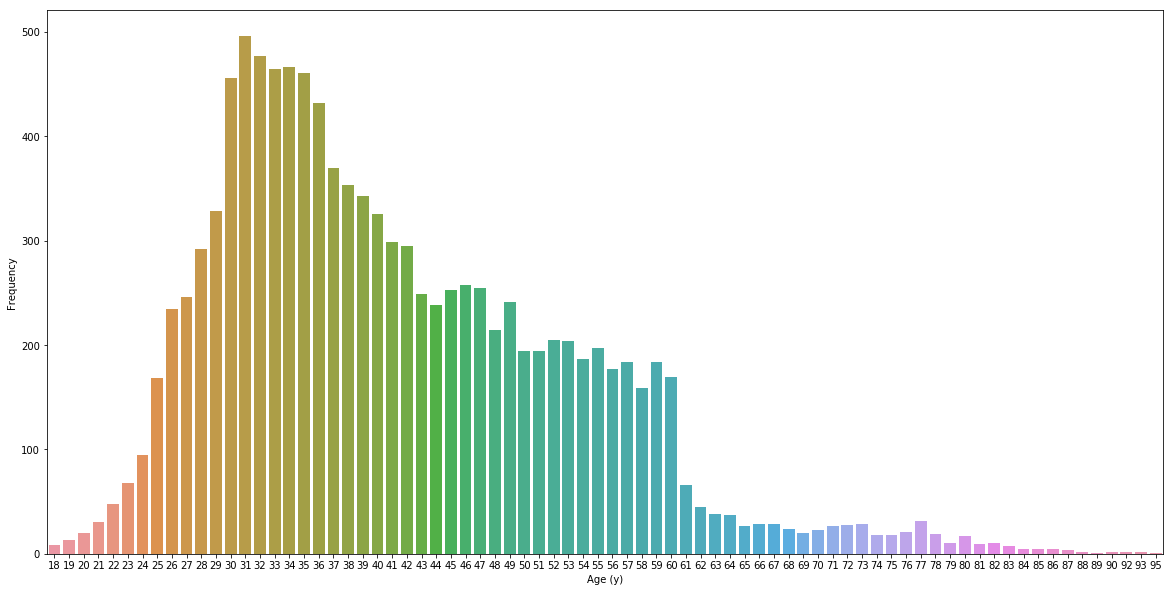

In [391]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot(x='age', data=clean_df, ax=ax)
ax.set_xlabel("Age (y)")
ax.set_ylabel("Frequency")
ax.tick_params(labelsize = 10)

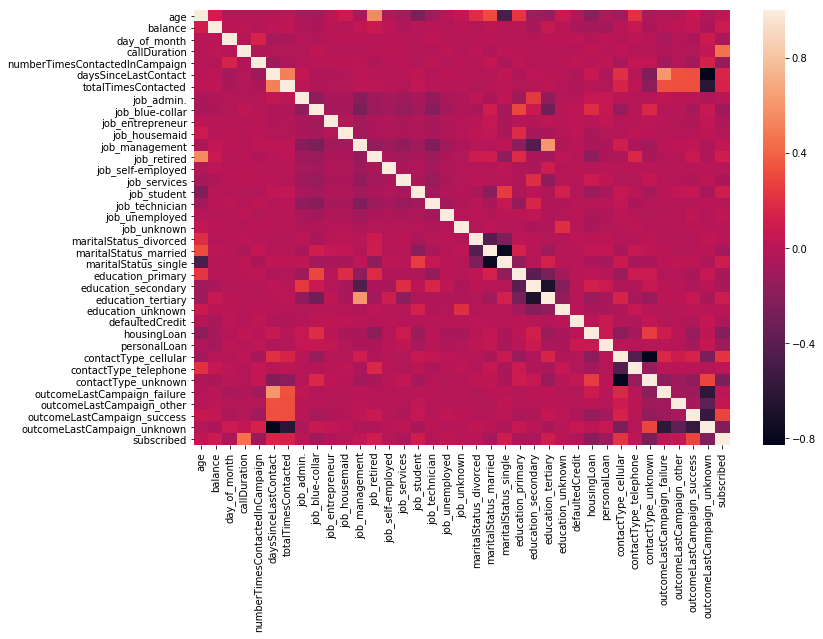

In [392]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(clean_df.corr(), ax=ax)

In [393]:
feature_corr = [(k, v) for k, v in dict(clean_df[features].corrwith(clean_df['subscribed'])).items()]
sorted_feature_corr = sorted(feature_corr, key=lambda x: x[1], reverse=True)
sorted_feature_corr

[('callDuration', 0.45191936084258355),
 ('outcomeLastCampaign_success', 0.28664160805822736),
 ('contactType_cellular', 0.22325229252685724),
 ('daysSinceLastContact', 0.15159251635244866),
 ('totalTimesContacted', 0.1398671182007805),
 ('job_retired', 0.1038271595365868),
 ('job_student', 0.0999527997661265),
 ('maritalStatus_single', 0.09463220490933996),
 ('education_tertiary', 0.0945983856516655),
 ('balance', 0.07909939088796786),
 ('outcomeLastCampaign_other', 0.044058527584285405),
 ('job_management', 0.036300802662969714),
 ('age', 0.034900927890282714),
 ('job_unemployed', 0.0334866059039117),
 ('outcomeLastCampaign_failure', 0.020714207785482767),
 ('contactType_telephone', 0.01642003527694503),
 ('education_unknown', 0.014354662880926943),
 ('maritalStatus_divorced', 0.0052280998156840446),
 ('job_unknown', 0.0018892247818706434),
 ('job_admin.', -0.0006097040078416176),
 ('job_self-employed', -0.004706544572016129),
 ('job_technician', -0.011556883839502347),
 ('job_housem

In [394]:
significant_features = {v[0]:v[1] for v in sorted_feature_corr if abs(v[1]) >= 0.1}
key_features = list(significant_features.keys())
significant_features

{'callDuration': 0.45191936084258355,
 'outcomeLastCampaign_success': 0.28664160805822736,
 'contactType_cellular': 0.22325229252685724,
 'daysSinceLastContact': 0.15159251635244866,
 'totalTimesContacted': 0.1398671182007805,
 'job_retired': 0.1038271595365868,
 'job_blue-collar': -0.10084005683269738,
 'personalLoan': -0.11057998365404784,
 'numberTimesContactedInCampaign': -0.1280808461248676,
 'housingLoan': -0.20388774933788478,
 'outcomeLastCampaign_unknown': -0.23046954163417435,
 'contactType_unknown': -0.25613616140693113}

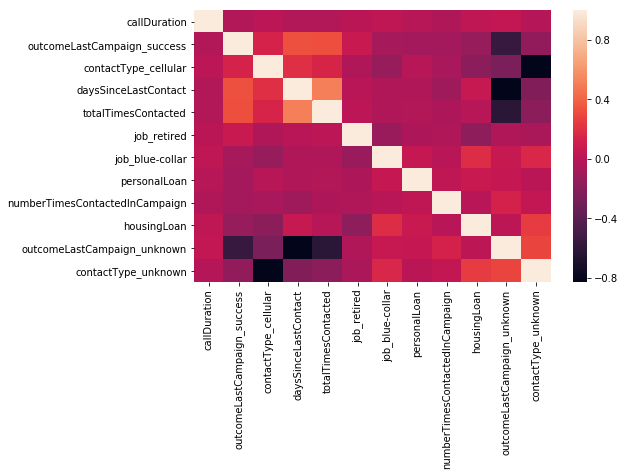

In [395]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.heatmap(clean_df[key_features].corr(), ax=ax)

In [396]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(clean_df[key_features], clean_df['subscribed'], test_size=0.33, random_state=42)

In [397]:
def normalize_cm(cm):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm

GradientBoosting cm: 0.8065111549610159
GradientBoosting f1: 0.8100220264317181


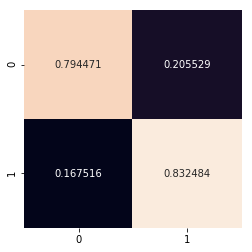

In [398]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
gbc = GradientBoostingClassifier()
cross_mean = cross_validate(gbc, X_train, y_train, scoring='f1')['test_score'].mean()
print(f'GradientBoosting cm: {cross_mean}')
clf = gbc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'GradientBoosting f1: {f1}')
ax = sns.heatmap(normalize_cm(confusion_matrix(y_test, y_pred)), square =True, annot = True, fmt = 'f', cbar= False)
ax.set_xlabel = 'Actual'
ax.set_ylabel = 'Predicted'

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

XGB cm: 0.810371259516117
XGB f1: 0.8100220264317181


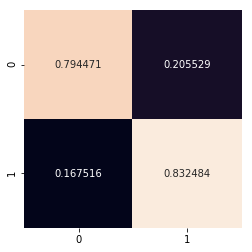

In [399]:
import xgboost as xgb

param={
    'objective': 'binary:logistic'
}
xgbc = xgb.XGBClassifier(**param)
cross_mean = cross_validate(xgbc, X_train, y_train, scoring='f1')['test_score'].mean()
print(f'XGB cm: {cross_mean}')
clf = gbc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'XGB f1: {f1}')
ax = sns.heatmap(normalize_cm(confusion_matrix(y_test, y_pred)), square =True, annot = True, fmt = 'f', cbar= False)
ax.set_xlabel = 'Actual'
ax.set_ylabel = 'Predicted'

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

LGBM cm: 0.8074364423976782
LGBM f1: 0.8100220264317181


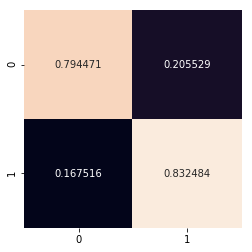

In [400]:
import lightgbm as lgb
param = {
    'num_leaves':31,
    'num_trees':100,
    'objective':'binary',
    'metric': 'auc'
}
clf = lgb.LGBMClassifier()
cross_mean = cross_validate(clf, X_train, y_train, scoring='f1')['test_score'].mean()
print(f'LGBM cm: {cross_mean}')
clf = gbc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'LGBM f1: {f1}')
ax = sns.heatmap(normalize_cm(confusion_matrix(y_test, y_pred)), square =True, annot = True, fmt = 'f', cbar= False)
ax.set_xlabel = 'Actual'
ax.set_ylabel = 'Predicted'

In [401]:
# Hyperparameter tuning
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

space  = [Integer(10, 100, name='num_leaves'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(10, 300, name='n_estimators')
          ]

@use_named_args(space)
def tune_lightgb(**params):
    params['objective'] = 'binary'
    params['metric'] = 'auc'
    clf = lgb.LGBMClassifier(**params)
    cross_mean = cross_validate(clf, X_train, y_train, scoring='f1')['test_score'].mean()
    return 1 - cross_mean

res_gp = gp_minimize(tune_lightgb, space, n_calls=50, random_state=0)
"Best score=%.4f" % res_gp.fun

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  
C:\Users\chuan\Anaconda3\envs\keras\

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

'Best score=0.1878'

In [402]:
res_gp.x

[17, 0.04787862416547335, 68]

In [403]:
clf = lgb.LGBMClassifier(num_leaves=17, learning_rate=0.047878624, n_estimators=68)
cross_mean = cross_validate(clf, X_train, y_train, scoring='f1')['test_score'].mean()
print(cross_mean)

C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

0.812187702748775


C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chuan\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empt

Tuned LGBM cm: 0.812187702748775
Tuned LGBM f1: 0.9800159872102318


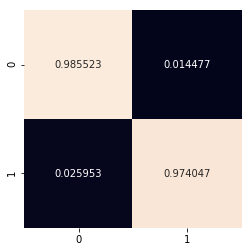

In [404]:
clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
cross_mean = cross_validate(clf, X_train, y_train, scoring='f1')['test_score'].mean()
print(f'Tuned LGBM cm: {cross_mean}')
clf = gbc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'Tuned LGBM f1: {f1}')
ax = sns.heatmap(normalize_cm(confusion_matrix(y_test, y_pred)), square =True, annot = True, fmt = 'f', cbar= False)
ax.set_xlabel = 'Actual'
ax.set_ylabel = 'Predicted'

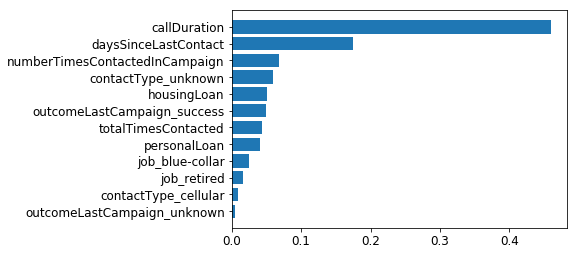

In [405]:
sorted_importance = sorted(list(zip(key_features, clf.feature_importances_)), key=lambda x:x[1])
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.tick_params(labelsize = 12)

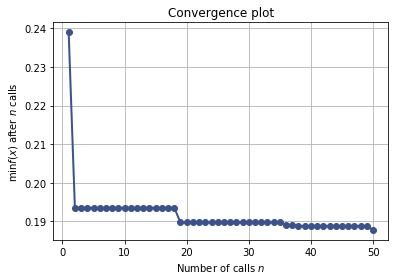

In [406]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)

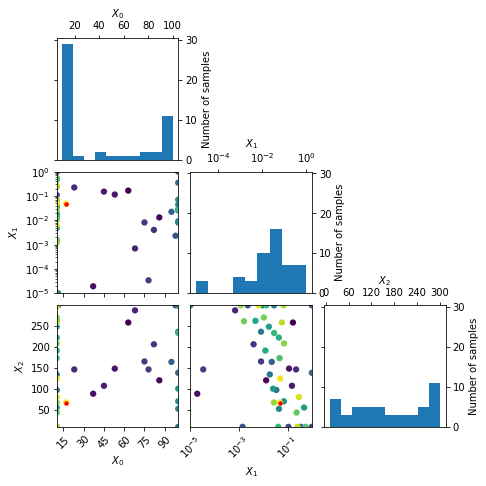

In [407]:
from skopt.plots import plot_evaluations
_ = plot_evaluations(res_gp, bins=10)

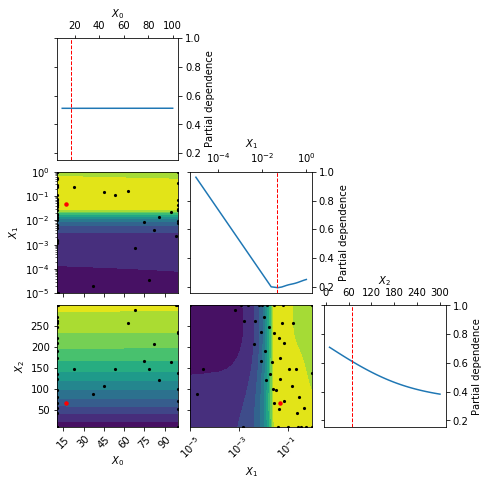

In [408]:
from skopt.plots import plot_objective

_ = plot_objective(res_gp)